**Dataset Information:**

* **Age** 1.20-65

* **Sex** 1. Male, 2.Female

* **Polyuria** 1.Yes, 2.No.

* **Polydipsia** 1.Yes, 2.No.

* **sudden weight loss** 1.Yes, 2.No.

* **weakness** 1.Yes, 2.No.

* **Polyphagia** 1.Yes, 2.No.

* **visual blurring** 1.Yes, 2.No.

* **Itching** 1.Yes, 2.No.

* **Irritability** 1.Yes, 2.No

* **delayed healing** 1.Yes, 2.No.

* **partial paresis** 1.Yes, 2.No.
 
* **muscle stiffness** 1.Yes, 2.No

* **Alopecia** 1.Yes, 2.No.

* **Obesity** 1.Yes, 2.No.

* **Class** 1.Positive, 2.Negative.

# Data Preparation

**Import Libraries**

In [1]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import eli5
from eli5.sklearn import PermutationImportance
import pickle



**Load data**

In [2]:
diab_data=pd.read_csv('data/diabetes_data_upload.csv')

**View data**

**Preview the first five rows of the dataset**

In [3]:
diab_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
diab_data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'visual blurring', 'Itching', 'Irritability',
       'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia',
       'Obesity', 'class'],
      dtype='object')

In [5]:
diab_data.shape

(520, 16)

In [6]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
 15  class               520 non-null    object
dtypes: int64(1), object(15)
me

# Data Cleaning

In [7]:
diab_data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [8]:
diab_data1 = diab_data.copy() #dataset copy

def age(i):
    for x in range(10,100,10):
        if i<x:
            m = f'{x-10}-{x}'
            return m
            break

diab_data1['age_group'] = diab_data['Age'].apply(lambda x:age(x))
diab_data1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,age_group
0,40,Male,No,Yes,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,40-50
1,58,Male,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Positive,50-60
2,41,Male,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Positive,40-50
3,45,Male,No,No,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,40-50
4,60,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,60-70


In [9]:
label_encoder = preprocessing.LabelEncoder()

for column in diab_data.columns[1:]:
    diab_data[column] =  label_encoder.fit_transform(diab_data[column])
    
diab_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Training the Data



In [10]:
X = diab_data.drop('class', axis =1)
y = diab_data['class']

In [11]:
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state = 1)

In [12]:
print('The shape of X_train', X_train.shape)
print('The shape of X_test', X_test.shape)
print('The shape of y_train', y_train.shape)
print('The shape of y_test', y_test.shape)

The shape of X_train (416, 15)
The shape of X_test (104, 15)
The shape of y_train (416,)
The shape of y_test (104,)


# **Building the Models**


Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

In [13]:
lr = LogisticRegression()
lr

LogisticRegression()

In [14]:
lr.fit(X_train, y_train)
print(f'model score on training data: {lr.score(X_train, y_train)}')
print(f'model score on testing data: {lr.score(X_test, y_test)}')
lr_pred = lr.predict(X_test)

model score on training data: 0.9302884615384616
model score on testing data: 0.9519230769230769


c:\Users\Rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print(len(X_train.columns.tolist()))
len(lr.coef_[0])

15


15

<span style= "font-size:18px; font-weight:bold;">Feature Importance for Logistic Regression</span>

Text(0.5, 1.0, 'Logistic Regression Feature Importances')

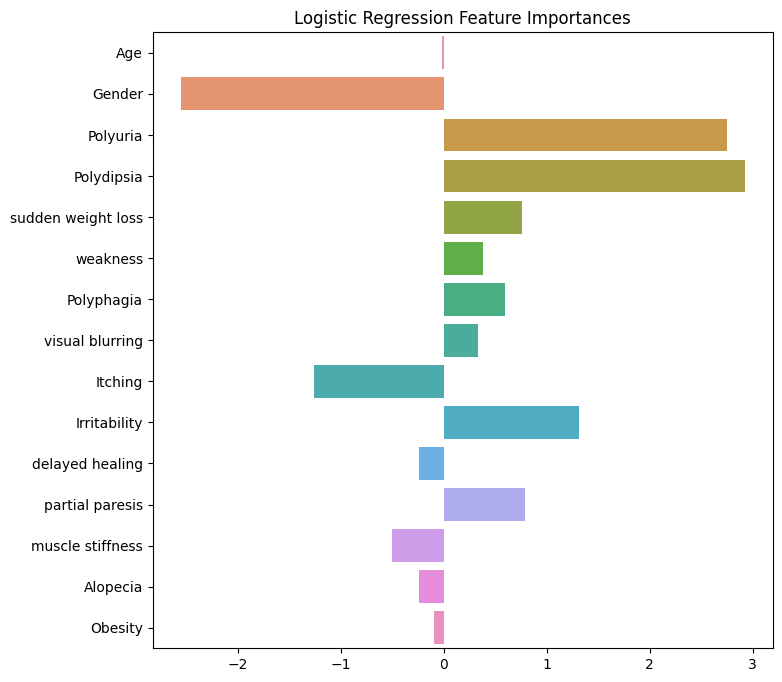

In [16]:
plt.figure(figsize = (8,8))
sns.barplot(x = lr.coef_[0], y = X_train.columns.tolist())
plt.title('Logistic Regression Feature Importances')

<span style= "font-size:18px; font-weight:bold;">Permutation Importance for Logistic Regression</span>

In [17]:
perm = PermutationImportance(lr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1346 ± 0.0544,Polyuria
0.1288 ± 0.0449,Polydipsia
0.1019 ± 0.0627,Gender
0.0462 ± 0.0077,Irritability
0.0269 ± 0.0224,Itching
0.0154 ± 0.0094,visual blurring
0.0135 ± 0.0094,sudden weight loss
0.0115 ± 0.0144,weakness
0.0096 ± 0.0122,Age
0.0077 ± 0.0077,Polyphagia



<span style= "font-size:18px; font-weight:bold;">Confusion Matrix for Logistic Regression</span>

Confusion matrix, a table that describes the performance of a classification model. Confusion Matrix tells us how many our model predicted correctly and incorrectly in terms of binary/multiple outcome classes by comparing actual and predicted cases.

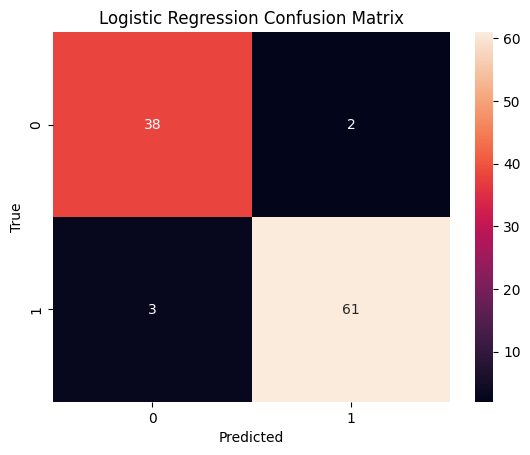

In [18]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [19]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.97      0.95      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



In [20]:
pickle.dump(lr, open('logisticRegr', 'wb'))